In [18]:
import os
# os.environ['CUDA_VISIBLE_DEVICES']='0'

import cv2
from io import BytesIO
import numpy as np
from PIL import Image

import tarfile
import tempfile
from six.moves import urllib

from matplotlib import gridspec
from matplotlib import pyplot as plt
%matplotlib inline


import tensorflow as tf
# from model_deeplab import *

In [76]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image

class DeepLabModel(object):
    """Class to load deeplab model and run inference."""
    INPUT_TENSOR_NAME = 'ImageTensor:0'
    OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
    INPUT_SIZE = 513
    FROZEN_GRAPH_NAME = 'frozen_inference_graph.pb'

    def __init__(self, model_dir):
        """Creates and loads pretrained deeplab model."""
        # We load the protobuf file from the disk and parse it to retrieve the 
        # unserialized graph_def

        self.graph = tf.Graph()
        with tf.gfile.GFile(os.path.join(model_dir, self.FROZEN_GRAPH_NAME), "rb") as f:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(f.read())

        # Then, we import the graph_def into a new Graph and returns it 
        with self.graph.as_default():
            # The name var will prefix every op/nodes in your graph
            # Since we load everything in a new graph, this is not needed
            tf.import_graph_def(graph_def, name="")
        self.sess = tf.Session(graph=self.graph)

    def run(self, image):
        """Runs inference on a single image.

        Args:
          image: A PIL.Image object, raw input image.

        Returns:
          resized_image: RGB image resized from original input image.
          seg_map: Segmentation map of `resized_image`.
        """
        width, height = image.size
        resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
        target_size = (int(resize_ratio * width), int(resize_ratio * height))
        resized_image = image.convert('RGB').resize(target_size, Image.ANTIALIAS)
        batch_seg_map = self.sess.run(
            self.OUTPUT_TENSOR_NAME,
            feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
        seg_map = np.array(batch_seg_map[0] == 15, np.uint8) * 255
        seg_map = np.stack((seg_map, seg_map, seg_map),axis=2).astype(np.uint8)
        rgb_img = np.array(resized_image)
        return rgb_img, seg_map

model_dir = '/Users/cmchang/magic-effect/model/deeplabv3_mnv2_pascal_train_aug/'
MODEL = DeepLabModel(model_dir)
print('model loaded successfully!')
    
# def create_pascal_label_colormap():
#     """Creates a label colormap used in PASCAL VOC segmentation benchmark.

#     Returns:
#     A Colormap for visualizing segmentation results.
#     """
#     colormap = np.zeros((256, 3), dtype=int)
#     ind = np.arange(256, dtype=int)

#     for shift in reversed(range(8)):
#         for channel in range(3):
#             colormap[:, channel] |= ((ind >> channel) & 1) << shift
#         ind >>= 3

#     return colormap


# def label_to_color_image(label):
#     """Adds color defined by the dataset colormap to the label.

#     Args:
#     label: A 2D array with integer type, storing the segmentation label.

#     Returns:
#     result: A 2D array with floating type. The element of the array
#       is the color indexed by the corresponding element in the input label
#       to the PASCAL color map.

#     Raises:
#     ValueError: If label is not of rank 2 or its value is larger than color
#       map maximum entry.
#     """
#     if label.ndim != 2:
#         raise ValueError('Expect 2-D input label')

#     colormap = create_pascal_label_colormap()

#     if np.max(label) >= len(colormap):
#         raise ValueError('label value too large.')

#     return colormap[label]


# def vis_segmentation(image, seg_map):
#     """Visualizes input image, segmentation map and overlay view."""
#     FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)

#     plt.figure(figsize=(15, 5))
#     grid_spec = gridspec.GridSpec(1, 4, width_ratios=[6, 6, 6, 1])

#     plt.subplot(grid_spec[0])
#     plt.imshow(image)
#     plt.axis('off')
#     plt.title('input image')

#     plt.subplot(grid_spec[1])
#     seg_image = label_to_color_image(seg_map).astype(np.uint8)
#     plt.imshow(seg_image)
#     plt.axis('off')
#     plt.title('segmentation map')

#     plt.subplot(grid_spec[2])
#     plt.imshow(image)
#     plt.imshow(seg_image, alpha=0.7)
#     plt.axis('off')
#     plt.title('segmentation overlay')

#     unique_labels = np.unique(seg_map)
#     ax = plt.subplot(grid_spec[3])
#     plt.imshow(
#       FULL_COLOR_MAP[unique_labels].astype(np.uint8), interpolation='nearest')
#     ax.yaxis.tick_right()
#     plt.yticks(range(len(unique_labels)), LABEL_NAMES[unique_labels])
#     plt.xticks([], [])
#     ax.tick_params(width=0.0)
#     plt.grid('off')
#     plt.show()


model loaded successfully!


### requirements

In [20]:
# !brew install ffmpeg
# !pip3 install ffmpeg ffprobe scikit-video pytube

In [21]:
# from pytube import YouTube
# url = "https://www.youtube.com/watch?v=G9ZM43ZpoCE" # Roger
# url = "https://www.youtube.com/watch?v=qAJLHBB5Js0" # Djokovic
# url = "https://www.youtube.com/watch?v=JA7G7AV-LT8" # Jordan
# yt = YouTube(url)
# yt.streams.first().download('~/magic-effect/')

In [77]:
# MODEL_NAME = 'mobilenetv2_coco_voctrainaug'  # @param ['mobilenetv2_coco_voctrainaug', 'mobilenetv2_coco_voctrainval', 'xception_coco_voctrainaug', 'xception_coco_voctrainval']

# _DOWNLOAD_URL_PREFIX = 'http://download.tensorflow.org/models/'
# _MODEL_URLS = {
#     'mobilenetv2_coco_voctrainaug':
#         'deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz',
#     'mobilenetv2_coco_voctrainval':
#         'deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz',
#     'xception_coco_voctrainaug':
#         'deeplabv3_pascal_train_aug_2018_01_04.tar.gz',
#     'xception_coco_voctrainval':
#         'deeplabv3_pascal_trainval_2018_01_04.tar.gz',
# }
# _TARBALL_NAME = 'deeplab_model.tar.gz'

# model_dir = '~/magic-effect/model/'#tempfile.mkdtemp()
# tf.gfile.MakeDirs(model_dir)

# download_path = os.path.join(model_dir, _TARBALL_NAME)
# print('downloading model, this might take a while...')
# urllib.request.urlretrieve(_DOWNLOAD_URL_PREFIX + _MODEL_URLS[MODEL_NAME],
#                    download_path)
# print('download completed! loading DeepLab model...')

model_dir = '/Users/cmchang/magic-effect/model/deeplabv3_mnv2_pascal_train_aug/'
MODEL = DeepLabModel(model_dir)
print('model loaded successfully!')

#@title Run on sample images {display-mode: "form"}

SAMPLE_IMAGE = 'image1'  # @param ['image1', 'image2', 'image3']
IMAGE_URL = ''  #@param {type:"string"}

_SAMPLE_URL = ('https://github.com/tensorflow/models/blob/master/research/'
               'deeplab/g3doc/img/%s.jpg?raw=true')

model loaded successfully!


In [78]:
COLORS = [(252,141,98),(102,194,165), (141,160,203),(231,138,195),(166,216,84)]

In [93]:
def run_segmentation(f):
    """Inferences DeepLab model and visualizes result."""
    try:
        if isinstance(f, str):
            original_img = Image.open(f)
        elif isinstance(f, np.ndarray):
            original_img = Image.fromarray(f)
    except:
        print("Unexpected error: invalid input")
        raise
    rgb_img, seg_map = MODEL.run(original_img)
    return rgb_img, seg_map

def find_cntr(cv2_img, n_max=5, th=1000):
    '''input: cv2_img = cv2.imread(img_path)'''
    '''output: mask '''
    b,g,r = cv2.split(cv2_img)  
    img = cv2.merge([r,g,b])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,th2 = cv2.threshold(gray,10,1,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(th2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    areas = [-cv2.contourArea(contour) for contour in contours]
    num = max(n_max, np.sum(np.array(areas) < (-1)*th))
    return [contours[top] for top in np.argsort(areas)[:num]]

def get_stroke(image, color, width=10):
    element = cv2.getStructuringElement(cv2.MORPH_RECT,(width,width))
    dilate = cv2.dilate(image, element)
    result = cv2.absdiff(dilate, image)
    retval, result = cv2.threshold(result, 0, 255, cv2.THRESH_BINARY)
    colored_result = np.stack((result/255.0 * color[0],
                               result/255.0 * color[1],
                               result/255.0 * color[2]), axis=2).astype(np.uint8)
    return cv2.medianBlur(colored_result, 1) # to make it smooth

def run_stroke_effect(f):
    rgb, fore = run_visualization(f)
    
    # find contours on person semantic mask
    contours = find_cntr(fore)
    
    # select at most five contours
    num = min(len(contours), 5)
    
    # combine all contours with different colors
    canvas = np.zeros(rgb.shape, np.uint8)
    for i in range(num):
        contour = cv2.drawContours(np.zeros(rgb.shape[0:2], np.uint8), contours, i, (255,255,255), -1)
        canvas += get_stroke(contour, color=COLORS[i], width=10)
    
    return rgb, canvas
    # combine with original images
#     rgb_new = rgb*(1-(s>0)) + s
#     return rgb, rgb_new

### Running

#### check step-by-step 

In [86]:
import skvideo.io

filename = 'example/origin-video_PeopleDance.mp4'
cap = skvideo.io.vread(filename)
print(cap.shape)

(300, 360, 640, 3)


In [88]:
image, fore = run_segmentation(cap[0])

# image = np.array(image)
# fore  = np.array(mask == 15, np.uint8) * 255 # 15 means person

# find contours on person semantic mask
k = find_cntr(fore)

#### Running for videos 

In [71]:
# for filename in os.listdir():
#     if '.mp4' in filename and 'video_' in filename and '-video_' not in filename:
#         print(filename)
#         cap = skvideo.io.vread(filename)
#         if filename == 'video_Roger.mp4':
#             video = cap[0:500:3]
#         elif filename == 'video_Kobe.mp4':
#             video = cap[935:1040]
#         elif filename == 'video_SuperMario.mp4':
#             video = cap[1430:1650]
#         elif filename == 'video_Kinjaz.mp4':
#             video = cap[2740:3170]
#         elif filename == 'video_Kinjaz2.mp4':
#             video = cap[180:450]
#         elif filename == 'video_PeopleDance.mp4':
#             video = cap[600:900]
#         elif filename == 'video_Aaron.mp4':
#             video = cap[1520:1720]
#         elif filename == 'video_Allen-lock.mp4':
#             video = cap[670:930]
#         else:
#             video = cap
#         skvideo.io.vwrite(fname='origin-{}'.format(filename), videodata = video, backend='ffmpeg', verbosity=1)

video_Aaron.mp4
/usr/local/bin/ffmpeg -y -f rawvideo -pix_fmt rgb24 -s 1280x720 -i - /Users/cmchang/magic-effect/origin-video_Aaron.mp4
video_Allen-lock.mp4
/usr/local/bin/ffmpeg -y -f rawvideo -pix_fmt rgb24 -s 1280x720 -i - /Users/cmchang/magic-effect/origin-video_Allen-lock.mp4
video_solo-dance.mp4
/usr/local/bin/ffmpeg -y -f rawvideo -pix_fmt rgb24 -s 640x360 -i - /Users/cmchang/magic-effect/origin-video_solo-dance.mp4
video_Kobe.mp4
/usr/local/bin/ffmpeg -y -f rawvideo -pix_fmt rgb24 -s 1280x720 -i - /Users/cmchang/magic-effect/origin-video_Kobe.mp4
video_animation.mp4
/usr/local/bin/ffmpeg -y -f rawvideo -pix_fmt rgb24 -s 1280x720 -i - /Users/cmchang/magic-effect/origin-video_animation.mp4
video_Jordan.mp4
/usr/local/bin/ffmpeg -y -f rawvideo -pix_fmt rgb24 -s 1280x720 -i - /Users/cmchang/magic-effect/origin-video_Jordan.mp4
video_Djokovic.mp4
/usr/local/bin/ffmpeg -y -f rawvideo -pix_fmt rgb24 -s 1280x720 -i - /Users/cmchang/magic-effect/origin-video_Djokovic.mp4
video_SuperMari

In [94]:
import time
start_time = time.time()
ori_video = list()
new_video = list()
for i in range(video.shape[0]):
    print('{}/{}'.format(i, video.shape[0]), end='\r')
    orif, newf = run_stroke_effect(video[i])
    ori_video.append(orif)
    new_video.append(newf)
newv = np.stack(new_video, axis=0)
oriv = np.stack(ori_video, axis=0)
print('time: {0:.3f}, output shape: {1}'.format(time.time()-start_time, newv.shape))

time: 172.573, output shape: (300, 288, 513, 3)


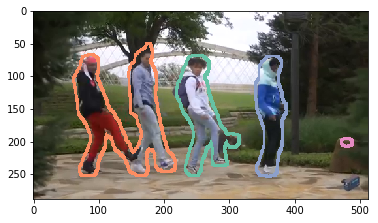

In [53]:
orif, newf = run_stroke_effect(video[100])
plt.imshow(newf)

In [57]:
newv = newv.astype(np.uint8)
oriv = oriv.astype(np.uint8)

In [56]:
skvideo.io.vwrite(fname='origin-{}'.format(filename), videodata = video, backend='ffmpeg', verbosity=1)

/usr/local/bin/ffmpeg -y -f rawvideo -pix_fmt rgb24 -s 640x360 -i - /Users/cmchang/magic-effect/origin-video_PeopleDance.mp4


In [58]:
skvideo.io.vwrite(fname='stroke-{}'.format(filename), videodata = newv, backend='ffmpeg', verbosity=1)

/usr/local/bin/ffmpeg -y -f rawvideo -pix_fmt rgb24 -s 513x288 -i - /Users/cmchang/magic-effect/stroke-video_PeopleDance.mp4


In [59]:
comp = np.concatenate((oriv, np.zeros(shape=(*oriv.shape[0:2], 10, 3), dtype=np.uint8), newv), axis=2)

In [60]:
skvideo.io.vwrite(fname='compare-{}'.format(filename), videodata = comp, backend='ffmpeg', verbosity=1)

/usr/local/bin/ffmpeg -y -f rawvideo -pix_fmt rgb24 -s 1036x288 -i - /Users/cmchang/magic-effect/compare-video_PeopleDance.mp4
